### **Multi Dimensional Knapsack Problem**

Helper Functions

In [1]:
import numpy as np
from docplex.mp.model import Model

def parse_mkp_dat_file(file_path):
    """
    Parses a .dat file for the Multidimensional Knapsack Problem (MKP).

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - n: int, number of variables (items).
    - m: int, number of constraints (dimensions).
    - optimal_value: int, the optimal value (if available, otherwise 0).
    - profits: list of int, profit values for each item.
    - weights: 2D list of int, weights of items across constraints.
    - capacities: list of int, capacity values for each constraint.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Read the first line: n (variables), m (constraints), optimal value
    n, m, optimal_value = map(int, lines[0].strip().split())

    # Read the profits for each item
    profits = []
    i = 1
    while len(profits) < n:
        profits.extend(map(int, lines[i].strip().split()))
        i += 1

    # Read the weights (m x n matrix)
    weights = []
    for _ in range(m):
        weight_row = []
        while len(weight_row) < n:
            weight_row.extend(map(int, lines[i].strip().split()))
            i += 1
        weights.append(weight_row)

    # Read the capacities for each dimension
    capacities = []
    while len(capacities) < m:
        capacities.extend(map(int, lines[i].strip().split()))
        i += 1

    # Validate data dimensions
    if len(profits) != n:
        raise ValueError(f"Mismatch in number of items: Expected {n}, got {len(profits)}")
    for row in weights:
        if len(row) != n:
            raise ValueError(f"Mismatch in weights row length: Expected {n}, got {len(row)}")
    if len(capacities) != m:
        raise ValueError(f"Mismatch in number of capacities: Expected {m}, got {len(capacities)}")

    return n, m, optimal_value, profits, weights, capacities

In [2]:
def generate_mkp_instance(file_path):
    """
    Generates a Multidimensional Knapsack Problem (MKP) instance from a .dat file.

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - A dictionary containing the MKP instance details:
        - n: Number of items
        - m: Number of constraints
        - profits: Profit values for each item
        - weights: Weight matrix (m x n)
        - capacities: Capacities for each constraint
    """
    n, m, optimal_value, profits, weights, capacities = parse_mkp_dat_file(file_path)

    mkp_instance = {
        "n": n,
        "m": m,
        "optimal_value": optimal_value,
        "profits": profits,
        "weights": weights,
        "capacities": capacities
    }

    return mkp_instance

def print_mkp_instance(mkp_instance):
    """
    Prints the details of a Multidimensional Knapsack Problem (MKP) instance.

    Parameters:
    - mkp_instance: dict, the MKP instance details.
    """
    print(f"Number of items (n): {mkp_instance['n']}")
    print(f"Number of constraints (m): {mkp_instance['m']}")
    print(f"Optimal value (if known): {mkp_instance['optimal_value']}")
    print("Profits:", mkp_instance['profits'])
    print("Weights:")
    for row in mkp_instance['weights']:
        print(row)
    print("Capacities:", mkp_instance['capacities'])

In [3]:
def create_mkp_model(mkp_instance):
    """
    Creates a CPLEX model for the Multidimensional Knapsack Problem (MKP).

    Parameters:
    - mkp_instance: dict, the MKP instance details.

    Returns:
    - model: CPLEX model.
    - x: list of CPLEX binary variables representing item selection.
    """
    n = mkp_instance['n']
    m = mkp_instance['m']
    profits = mkp_instance['profits']
    weights = mkp_instance['weights']
    capacities = mkp_instance['capacities']

    # Create CPLEX model
    model = Model(name="Multidimensional Knapsack Problem")

    # Decision variables: x[i] = 1 if item i is selected, 0 otherwise
    x = model.binary_var_list(n, name="x")

    # Objective: Maximize total profit
    model.maximize(model.sum(profits[i] * x[i] for i in range(n)))

    # Constraints: Ensure total weights do not exceed capacity for each dimension
    for j in range(m):
        model.add_constraint(
            model.sum(weights[j][i] * x[i] for i in range(n)) <= capacities[j],
            f"capacity_constraint_{j}"
        )

    return model, x

Read the file

In [4]:
file_path = "instances/hp1.dat"

Generate the test instance

In [5]:
mkp_instance = generate_mkp_instance(file_path)

# Print the MKP instance details
print_mkp_instance(mkp_instance)

# Create and solve the MKP model
model, x = create_mkp_model(mkp_instance)

Number of items (n): 28
Number of constraints (m): 4
Optimal value (if known): 3418
Profits: [560, 1125, 68, 328, 47, 122, 196, 41, 25, 115, 82, 22, 631, 132, 420, 86, 42, 103, 81, 26, 49, 316, 72, 71, 49, 108, 116, 90]
Weights:
[40, 91, 3, 12, 3, 18, 25, 1, 1, 8, 1, 1, 49, 8, 21, 6, 1, 5, 8, 1, 0, 42, 6, 4, 8, 0, 10, 1]
[16, 92, 4, 18, 6, 0, 8, 2, 1, 6, 2, 1, 70, 9, 22, 4, 1, 5, 6, 0, 4, 8, 4, 3, 0, 10, 0, 6]
[38, 39, 5, 40, 8, 12, 15, 0, 1, 20, 3, 0, 40, 6, 8, 0, 6, 4, 4, 1, 5, 8, 2, 8, 0, 20, 0, 0]
[38, 52, 7, 20, 0, 3, 4, 1, 2, 4, 6, 1, 18, 15, 38, 10, 4, 8, 0, 3, 0, 6, 1, 3, 0, 3, 5, 4]
Capacities: [219, 203, 208, 180]


In [6]:
print(model.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Maximize
 obj: 560 x_0 + 1125 x_1 + 68 x_2 + 328 x_3 + 47 x_4 + 122 x_5 + 196 x_6
      + 41 x_7 + 25 x_8 + 115 x_9 + 82 x_10 + 22 x_11 + 631 x_12 + 132 x_13
      + 420 x_14 + 86 x_15 + 42 x_16 + 103 x_17 + 81 x_18 + 26 x_19 + 49 x_20
      + 316 x_21 + 72 x_22 + 71 x_23 + 49 x_24 + 108 x_25 + 116 x_26 + 90 x_27
Subject To
 capacity_constraint_0: 40 x_0 + 91 x_1 + 3 x_2 + 12 x_3 + 3 x_4 + 18 x_5
                        + 25 x_6 + x_7 + x_8 + 8 x_9 + x_10 + x_11 + 49 x_12
                        + 8 x_13 + 21 x_14 + 6 x_15 + x_16 + 5 x_17 + 8 x_18
                        + x_19 + 42 x_21 + 6 x_22 + 4 x_23 + 8 x_24 + 10 x_26
                        + x_27 <= 219
 capacity_constraint_1: 16 x_0 + 92 x_1 + 4 x_2 + 18 x_3 + 6 x_4 + 8 x_6 + 2 x_7
                        + x_8 + 6 x_9 + 2 x_10 + x_11 + 70 x_12 + 9 x_13
                        + 22 x_14 + 4 x_15 + x_16 + 5 x_17 + 6

Solve via CPLEX

In [7]:
# Solve the model
solution = model.solve()

if solution:
    print("Objective value (total profit):", solution.objective_value)
    selected_items = [i + 1 for i in range(mkp_instance['n']) if x[i].solution_value > 0.5]  # Convert to 1-based index
    print("Selected items:", selected_items)
else:
    print("No solution found.")

Objective value (total profit): 3418.0
Selected items: [1, 2, 4, 5, 8, 10, 11, 12, 15, 17, 19, 21, 23, 24, 25, 26, 27, 28]


Converting to QUBO


In [8]:
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.converters import QuadraticProgramToQubo

qp = from_docplex_mp(model)
print(qp.export_as_lp_string()) # make it into a quadratic program

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Maximize
 obj: 560 x_0 + 1125 x_1 + 68 x_2 + 328 x_3 + 47 x_4 + 122 x_5 + 196 x_6
      + 41 x_7 + 25 x_8 + 115 x_9 + 82 x_10 + 22 x_11 + 631 x_12 + 132 x_13
      + 420 x_14 + 86 x_15 + 42 x_16 + 103 x_17 + 81 x_18 + 26 x_19 + 49 x_20
      + 316 x_21 + 72 x_22 + 71 x_23 + 49 x_24 + 108 x_25 + 116 x_26 + 90 x_27
Subject To
 capacity_constraint_0: 40 x_0 + 91 x_1 + 3 x_2 + 12 x_3 + 3 x_4 + 18 x_5
                        + 25 x_6 + x_7 + x_8 + 8 x_9 + x_10 + x_11 + 49 x_12
                        + 8 x_13 + 21 x_14 + 6 x_15 + x_16 + 5 x_17 + 8 x_18
                        + x_19 + 42 x_21 + 6 x_22 + 4 x_23 + 8 x_24 + 10 x_26
                        + x_27 <= 219
 capacity_constraint_1: 16 x_0 + 92 x_1 + 4 x_2 + 18 x_3 + 6 x_4 + 8 x_6 + 2 x_7
                        + x_8 + 6 x_9 + 2 x_10 + x_11 + 70 x_12 + 9 x_13
                        + 22 x_14 + 4 x_15 + x_16 + 5 x_17 + 6

In [9]:
converter = QuadraticProgramToQubo()
qubo = converter.convert(qp)        # converting the quadratic program to qubo

print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Multidimensional Knapsack Problem

Minimize
 obj: - 274155056 x_0 - 574678221 x_1 - 38624780 x_2 - 186534424 x_3
      - 36267719 x_4 - 71510666 x_5 - 112103068 x_6 - 8249681 x_7 - 10145545 x_8
      - 80446915 x_9 - 23867674 x_10 - 6169318 x_11 - 374062879 x_12
      - 77136828 x_13 - 180047532 x_14 - 40233734 x_15 - 24492762 x_16
      - 44906839 x_17 - 38962977 x_18 - 9909842 x_19 - 18979345 x_20
      - 139024684 x_21 - 27895128 x_22 - 37804943 x_23 - 17954545 x_24
      - 68969148 x_25 - 31666436 x_26 - 22105026 x_27
      - 2244312 capacity_constraint_0@int_slack@0
      - 4488624 capacity_constraint_0@int_slack@1
      - 8977248 capacity_constraint_0@int_slack@2
      - 17954496 capacity_constraint_0@int_slack@3
      - 35908992 capacity_constraint_0@int_slack@4
      - 71817984 capacity_constraint_0@int_slack@5
      - 143635968 capacity_constraint_0@int_slack@6
      - 206476704 capacity_constraint_

In [10]:
# number of variables
num_vars = qubo.get_num_vars()
print('Number of variables:', num_vars)

Number of variables: 60


Check Qiskit Version

In [11]:
import qiskit 
print(qiskit.__version__)

2.0.0


In [26]:
# basic imports

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# quantum imports

from qiskit.circuit import Parameter,QuantumCircuit
from qiskit_optimization.translators import from_docplex_mp

from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2



# SciPy minimizer routine
from scipy.optimize import minimize
from qiskit.primitives import BackendEstimatorV2, BackendSamplerV2
from qiskit_aer import AerSimulator
backend = AerSimulator(method='matrix_product_state')


estimator = BackendEstimatorV2(backend=backend)
sampler = BackendSamplerV2(backend=backend)

In [27]:
num_vars = qubo.get_num_vars()
print(f"Number of variables: {num_vars}")


Number of variables: 60


In [28]:
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 178422804.5
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIII

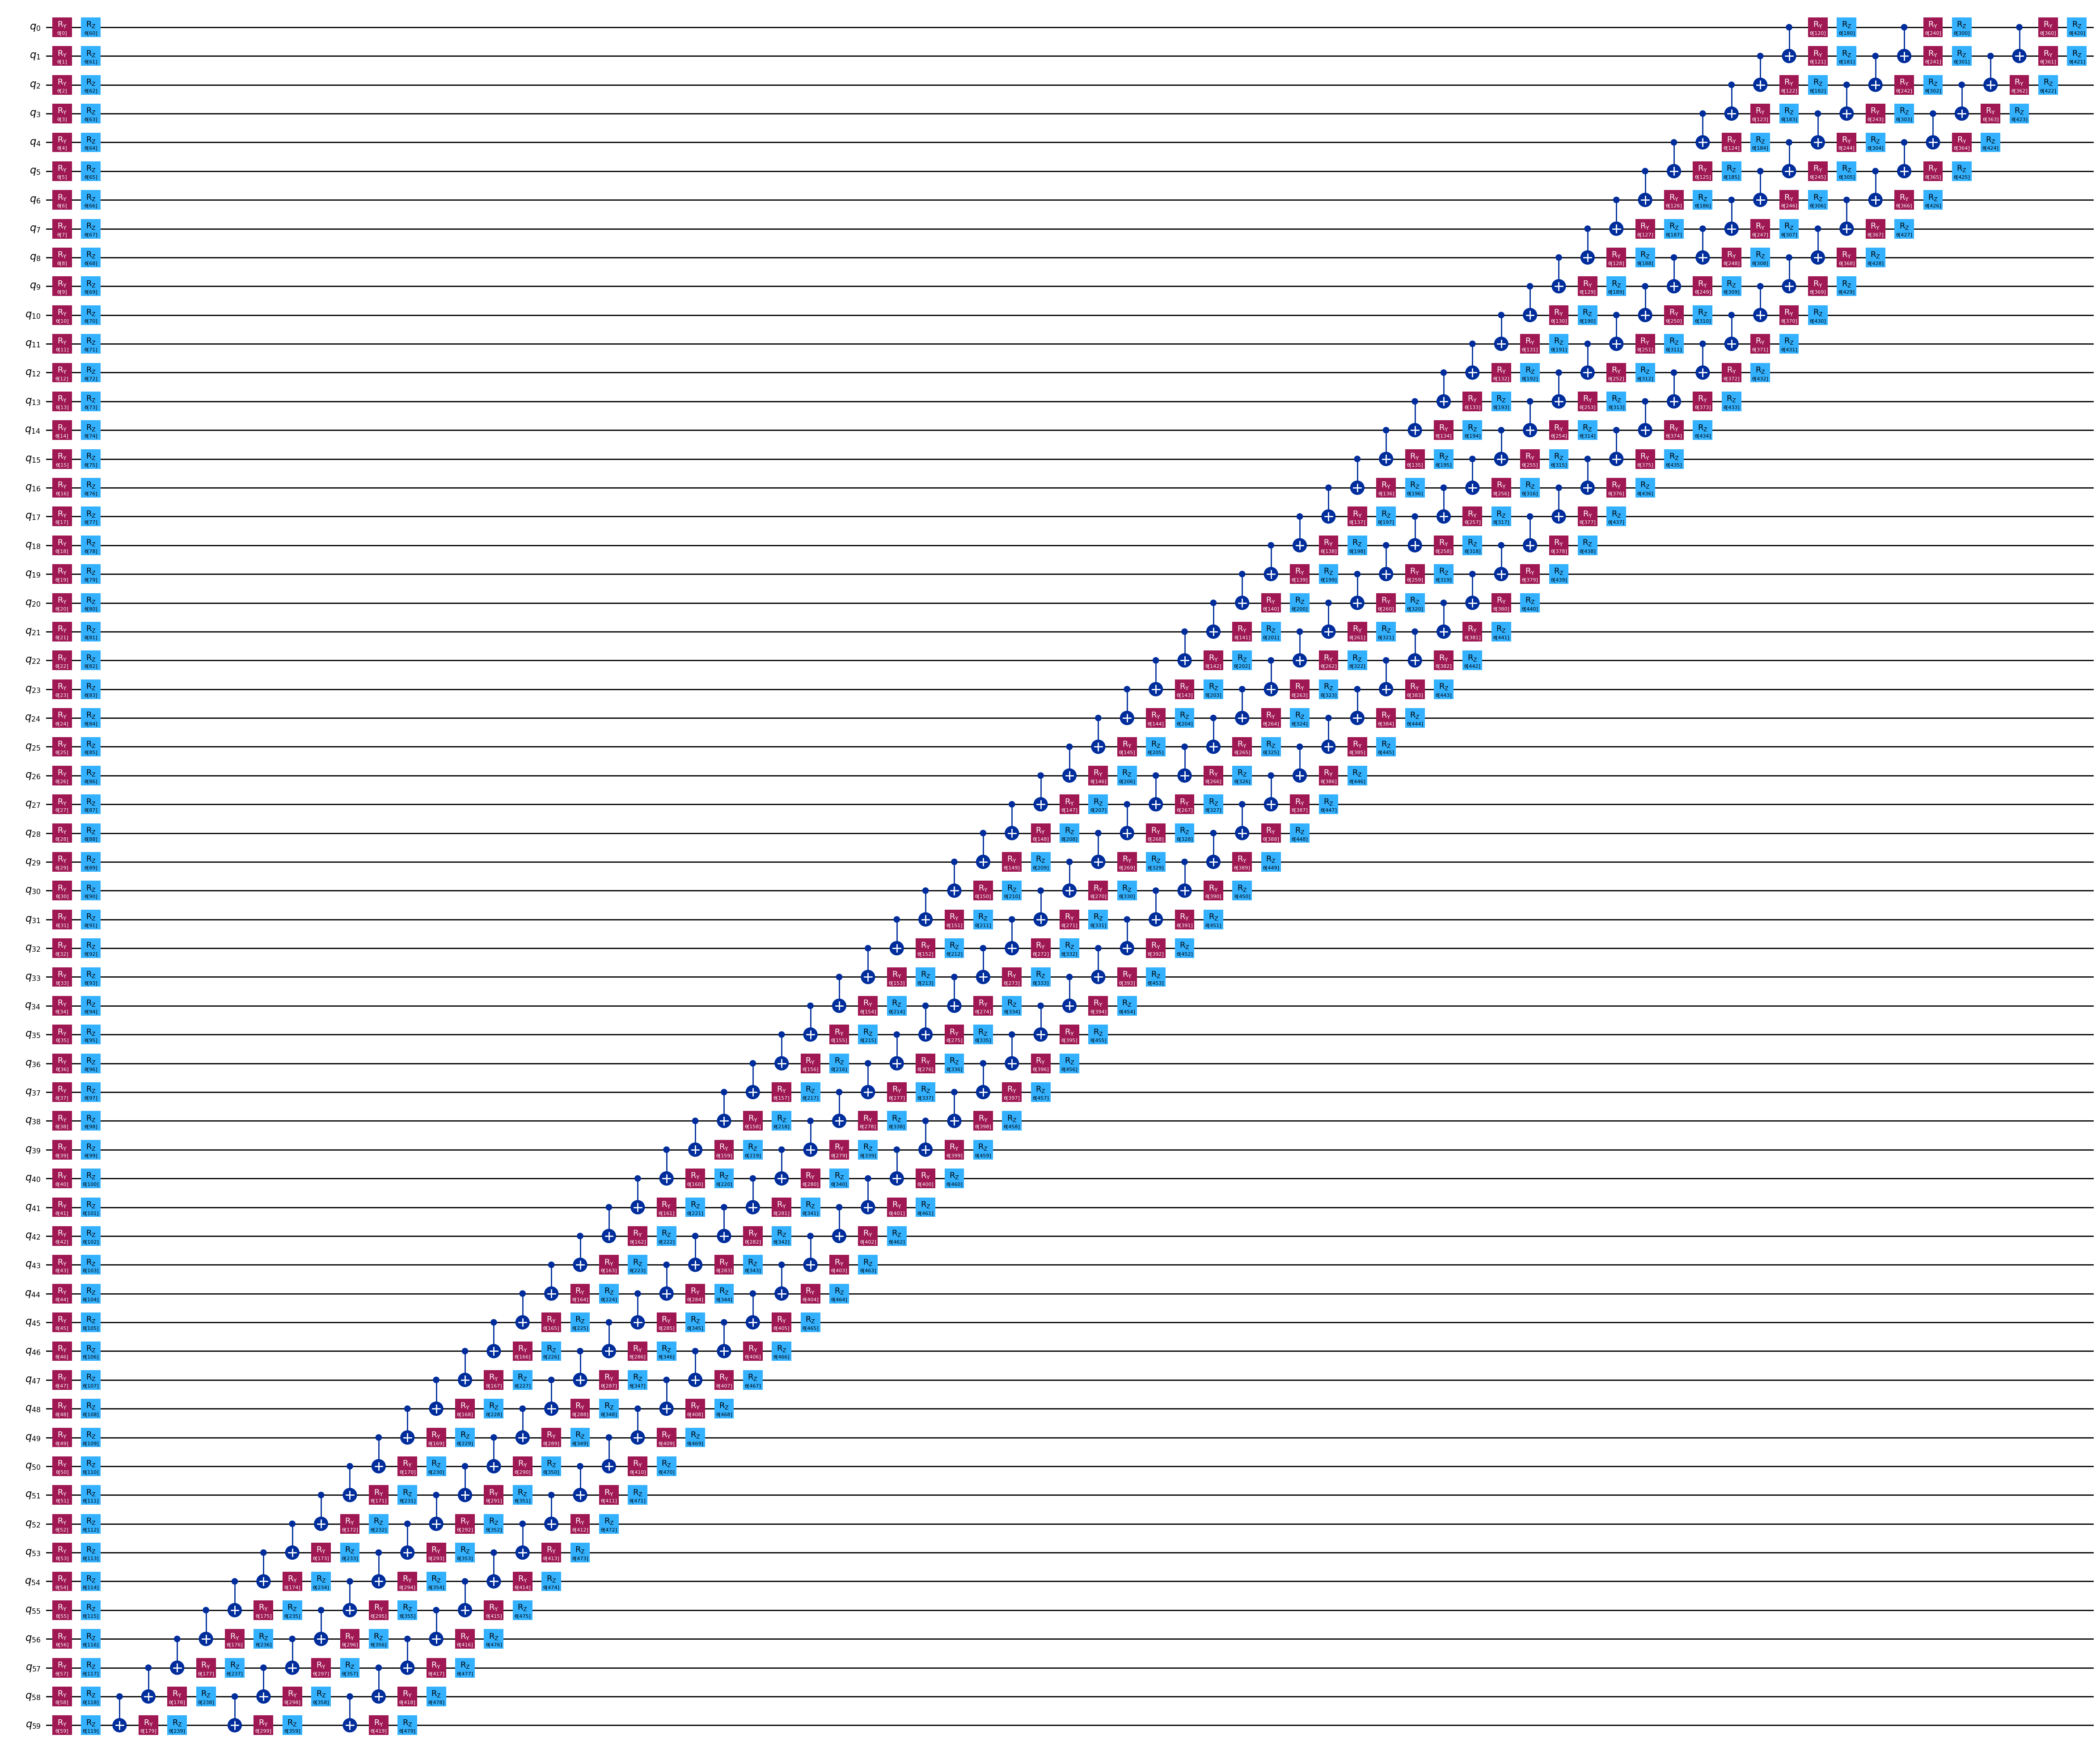

In [29]:
ansatz = EfficientSU2(qubitOp.num_qubits)
ansatz.decompose().draw("mpl", style="iqp",fold=-1)

In [30]:
num_params = ansatz.num_parameters
num_params

480

In [31]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [32]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [ ]:
x0 = 2 * np.pi * np.random.random(num_params)


array([8.10878557e-01, 4.64136966e+00, 3.37327790e+00, 8.62617662e-01,
       4.82588165e+00, 6.20996411e+00, 2.57073588e+00, 3.17321367e+00,
       5.49976854e+00, 4.98436337e-01, 1.05781171e+00, 3.87925926e+00,
       2.66694130e+00, 2.87330903e+00, 4.33499176e+00, 3.33915270e+00,
       1.99190953e-01, 1.42327688e+00, 6.06390634e+00, 3.22421605e+00,
       1.34197454e+00, 5.85635534e+00, 5.26112605e+00, 4.50426044e+00,
       1.61747624e+00, 3.07322179e+00, 6.42942977e-02, 3.39766378e+00,
       1.19109537e+00, 4.06564850e-01, 4.76096852e+00, 1.17719986e+00,
       2.57913923e+00, 6.13356254e+00, 3.09050553e+00, 2.69753743e+00,
       5.92991571e-01, 1.04377037e+00, 1.81783688e+00, 3.74610790e+00,
       6.09813085e+00, 3.44874520e+00, 2.56977267e+00, 2.67496399e-01,
       7.81662101e-01, 2.92471882e+00, 4.60249970e+00, 1.94491904e+00,
       7.62820962e-02, 3.44895655e+00, 4.06451141e+00, 2.24564252e+00,
       4.71788239e+00, 3.90752088e+00, 3.82918271e+00, 3.11035016e+00,
      

In [34]:
ansatz = ansatz.decompose()

res = minimize(
        cost_func,
        x0,
        args=(ansatz, qubitOp, estimator),
        method="cobyla",
    )

Iters. done: 1 [Current cost: -33835950.81591797]
Iters. done: 2 [Current cost: -43017558.0612793]
Iters. done: 3 [Current cost: -33299285.240966797]
Iters. done: 4 [Current cost: -38128405.541259766]
Iters. done: 5 [Current cost: -37170879.740478516]
Iters. done: 6 [Current cost: -43642069.83251953]
Iters. done: 7 [Current cost: -41965303.997558594]
Iters. done: 8 [Current cost: -40118011.584472656]
Iters. done: 9 [Current cost: -43420799.17163086]
Iters. done: 10 [Current cost: -39758439.615722656]
Iters. done: 11 [Current cost: -45273760.12988281]
Iters. done: 12 [Current cost: -41586892.935302734]
Iters. done: 13 [Current cost: -41313808.02294922]
Iters. done: 14 [Current cost: -41258857.271484375]
Iters. done: 15 [Current cost: -44717664.65258789]
Iters. done: 16 [Current cost: -45957717.16064453]
Iters. done: 17 [Current cost: -42263711.08129883]
Iters. done: 18 [Current cost: -42645510.966308594]
Iters. done: 19 [Current cost: -44577569.03613281]
Iters. done: 20 [Current cost: -

In [35]:
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -73117991.25341797
       x: [ 1.956e+00  4.377e+00 ...  1.773e+00  4.571e+00]
    nfev: 1000
   maxcv: 0.0

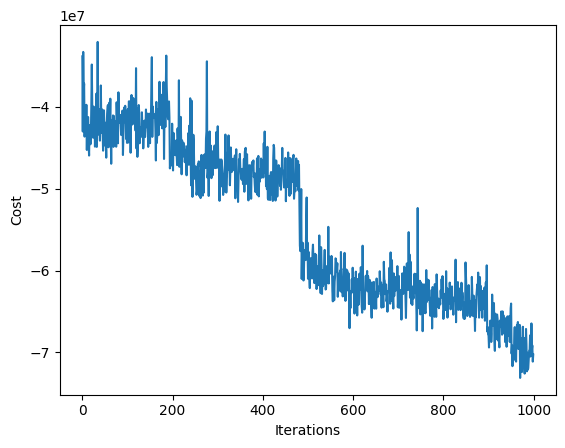

In [36]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
ansatz = ansatz.assign_parameters(res.x)
ansatz.measure_all()
ansatz.draw("mpl", style="iqp",fold=-1)

In [38]:
pub = (ansatz,)
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}

In [39]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, num_vars)
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]


In [40]:
# Find the indices of the top 4 values
top_4_indices = np.argsort(np.abs(values))[::-1][:4]
top_4_results = []
# Print the top 4 results with their probabilities
print("Top 4 Results:")
for idx in top_4_indices:
    bitstring = to_bitstring(keys[idx], num_vars)
    bitstring.reverse()
    top_4_results.append(bitstring)
    print(f"Bitstring: {bitstring}, Probability: {values[idx]:.6f}")

Top 4 Results:
Bitstring: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], Probability: 0.000100
Bitstring: [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], Probability: 0.000100
Bitstring: [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], Probability: 0.000100
Bitstring: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], Probability: 0.000100


In [ ]:
result = converter.interpret(most_likely_bitstring)
cost = qp.objective.evaluate(result)
feasible =qp.get_feasibility_info(result)[0]


print("Result knapsack:", result)
print("Result value:", cost)
print("Feasible:", feasible)

In [44]:
# Iterate through the list of bitstrings and evaluate for each
for bitstring in top_4_results:
    result = converter.interpret(bitstring)  # Interpret the bitstring
    cost = qp.objective.evaluate(result)  # Evaluate the cost for the bitstring
    feasible =qp.get_feasibility_info(result)[0]
    
    # Print the results
    print("Result knapsack:", result)
    print("Result value:", cost)
    print("Feasible solution:", feasible)

Result knapsack: [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0.]
Result value: 2588.0
Feasible solution: True
Result knapsack: [1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0.]
Result value: 1858.0
Feasible solution: True
Result knapsack: [1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1.]
Result value: 1365.0
Feasible solution: True
Result knapsack: [0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1.]
Result value: 2610.0
Feasible solution: False
